# CalibSet Analysis

**Arquitectura:**
- `CalibSet`: Data class que integra Sensor + Run
- `CalibSet.sensors`: Set de 12 instancias Sensor (del config)
- `CalibSet.runs`: List de ~4 instancias Run válidas
- `CalibSet.mean_offsets`: Promedio de offsets de los 4 runs (respecto a referencia interna)
- `CalibSet.std_offsets`: Desviación estándar de los 4 runs
- **Todo el procesamiento en utils.py**

**Importante:** CalibSet NO sabe nada de raised sensors o parent_sets. Eso es responsabilidad de Tree.

---

## 1. Setup e Imports

In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir path del proyecto (src)
project_root = Path.cwd().parent
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

# Imports locales (nombres de archivos, no nombres de clases)
from calibset import CalibSet  # El archivo es calibset.py
from sensor import Sensor
from run import Run
import utils

print("✓ Imports exitosos")

✓ Imports exitosos


## 2. Cargar Config y Logfile

In [2]:
# Cargar configuración
config = utils.load_config()
print(f"Config cargado con {len(config.get('sensors', {}).get('sets', {}))} sets")

# Cargar logfile
logfile_path = project_root / "data" / "LogFile.csv"
logfile = pd.read_csv(logfile_path)
print(f"Logfile cargado: {len(logfile)} runs")

Config cargado con 60 sets
Logfile cargado: 832 runs


## 3. Crear un CalibSet vacío

In [3]:
# Crear CalibSet vacío
calib_set = CalibSet(set_number=3.0)

print(f"CalibSet creado: {calib_set}")
print(f"  - set_number: {calib_set.set_number}")
print(f"  - sensors: {len(calib_set.sensors)} instancias")
print(f"  - runs: {len(calib_set.runs)} instancias")
print(f"  - reference_id: {calib_set.reference_id}")
print(f"  - mean_offsets: {len(calib_set.mean_offsets)}")
print(f"  - std_offsets: {len(calib_set.std_offsets)}")

CalibSet creado: CalibSet(set=3.0, sensors=0, runs=0, offsets=0, ref=None)
  - set_number: 3.0
  - sensors: 0 instancias
  - runs: 0 instancias
  - reference_id: None
  - mean_offsets: 0
  - std_offsets: 0


## 4. Crear CalibSet completo con utils (TODO AUTOMÁTICO)

In [4]:
# UNA SOLA LLAMADA - Utils hace todo el trabajo
calib_set = utils.create_calibration_set(
    set_number=3.0,
    logfile=logfile,
    config=config
)

print(f"\n{calib_set}")
print(f"\nDetalles:")
print(f"  - Set number: {calib_set.set_number}")
print(f"  - Sensors: {len(calib_set.sensors)} instancias")
print(f"  - Runs: {len(calib_set.runs)} válidos")
print(f"  - Reference: {calib_set.reference_id}")
print(f"  - Offsets calculados: {len(calib_set.mean_offsets)}")

✓ Set 3.0: 12 sensores creados
  Referencia: 48060
  Procesando 4 runs válidos...
  ✓ 4 runs válidos con offsets
  ✓ Estadísticas calculadas: 12/12 sensores

CalibSet(set=3.0, sensors=12, runs=4, offsets=12, ref=48060)

Detalles:
  - Set number: 3.0
  - Sensors: 12 instancias
  - Runs: 4 válidos
  - Reference: 48060
  - Offsets calculados: 12


## 5. Explorar los Sensors del CalibSet

In [5]:
print("Sensors en el CalibSet:")
print("=" * 50)

# Iterar sobre el Set de Sensors
for sensor in sorted(calib_set.sensors, key=lambda s: s.id):
    print(f"  {sensor}")

print(f"\nTotal: {len(calib_set.sensors)} sensores")

Sensors en el CalibSet:
  Sensor(id=48060)
  Sensor(id=48061)
  Sensor(id=48062)
  Sensor(id=48063)
  Sensor(id=48202)
  Sensor(id=48203)
  Sensor(id=48204)
  Sensor(id=48205)
  Sensor(id=48476)
  Sensor(id=48477)
  Sensor(id=48478)
  Sensor(id=48479)

Total: 12 sensores


## 6. Explorar los Runs del CalibSet

In [6]:
print("Runs en el CalibSet:")
print("=" * 50)

# Iterar sobre la List de Runs
for i, run in enumerate(calib_set.runs, 1):
    print(f"[{i}] {run}")
    print(f"    Filename: {run.filename}")
    print(f"    Reference: {run.reference_id}")
    print(f"    Offsets: {len(run.offsets)} sensores")
    print(f"    Omitidos: {len(run.omitted_sensors)} sensores")
    print()

print(f"Total: {len(calib_set.runs)} runs válidos")

Runs en el CalibSet:
[1] Run('20220531_ln2_r48176_r48177_48060_48479_7', valid=True, offsets=12, omitted=0)
    Filename: 20220531_ln2_r48176_r48177_48060_48479_7
    Reference: 48060
    Offsets: 12 sensores
    Omitidos: 0 sensores

[2] Run('20220531_ln2_r48176_r48177_48060_48479_8', valid=True, offsets=12, omitted=0)
    Filename: 20220531_ln2_r48176_r48177_48060_48479_8
    Reference: 48060
    Offsets: 12 sensores
    Omitidos: 0 sensores

[3] Run('20220531_ln2_r48176_r48177_48060_48479_9', valid=True, offsets=12, omitted=0)
    Filename: 20220531_ln2_r48176_r48177_48060_48479_9
    Reference: 48060
    Offsets: 12 sensores
    Omitidos: 0 sensores

[4] Run('20220531_ln2_r48176_r48177_48060_48479_10', valid=True, offsets=12, omitted=0)
    Filename: 20220531_ln2_r48176_r48177_48060_48479_10
    Reference: 48060
    Offsets: 12 sensores
    Omitidos: 0 sensores

Total: 4 runs válidos


## 7. Ver Mean Offsets y Std Offsets

In [7]:
# Crear DataFrame con los resultados
offset_data = []
for sensor_id in sorted(calib_set.mean_offsets.keys()):
    offset_data.append({
        'sensor_id': sensor_id,
        'mean_offset': calib_set.mean_offsets[sensor_id],
        'std_offset': calib_set.std_offsets.get(sensor_id, 0.0),
        'is_reference': sensor_id == calib_set.reference_id
    })

df_offsets = pd.DataFrame(offset_data)

print(f"Mean Offsets y Std Offsets (Set {calib_set.set_number}):")
print("=" * 70)
display(df_offsets)

print(f"\nEstadísticas:")
print(f"  Mean offset promedio: {df_offsets['mean_offset'].abs().mean():.6f} K")
print(f"  Std promedio: {df_offsets['std_offset'].mean():.6f} K")
print(f"  Max mean offset: {df_offsets['mean_offset'].abs().max():.6f} K")
print(f"  Max std: {df_offsets['std_offset'].max():.6f} K")

Mean Offsets y Std Offsets (Set 3.0):


,sensor_id,mean_offset,std_offset,is_reference
0,48060,0.000000,0.000000,True
1,48061,-0.033575,0.000141,False
2,48062,-0.023372,0.000160,False
3,48063,-0.034028,0.000176,False
4,48202,-0.100688,0.000172,False
5,48203,-0.073624,0.000183,False
6,48204,-0.041609,0.000179,False
7,48205,0.257481,0.000178,False
8,48476,-0.084025,0.000188,False
9,48477,-0.083423,0.000172,False



Estadísticas:
  Mean offset promedio: 0.070600 K
  Std promedio: 0.000158 K
  Max mean offset: 0.257481 K
  Max std: 0.000188 K


## 8. Visualizar Mean Offsets

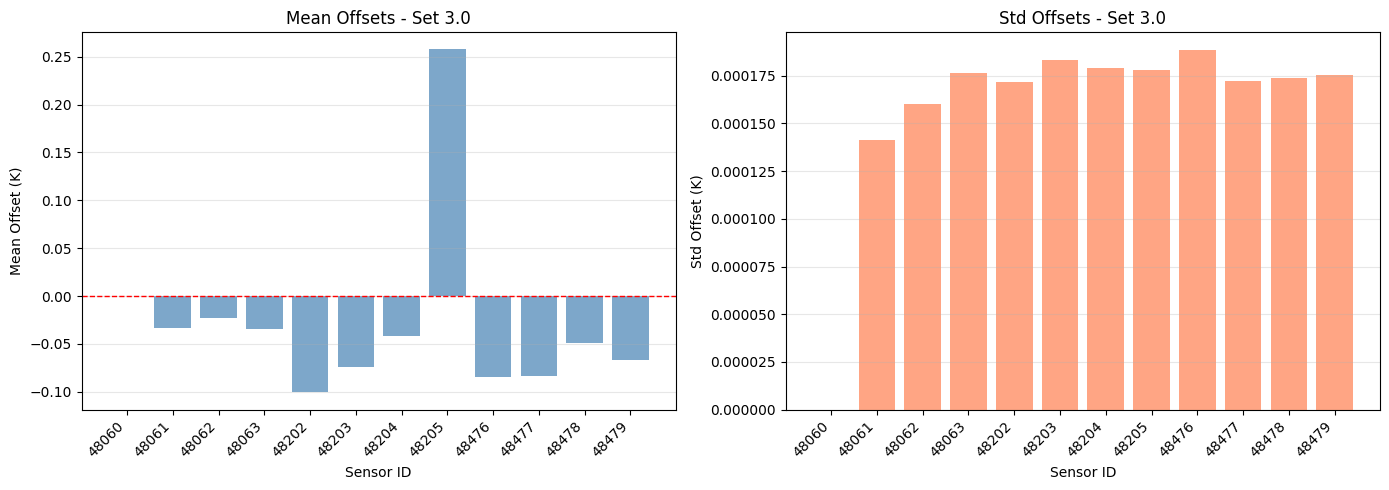

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Mean offsets
sensor_ids = df_offsets['sensor_id'].values
mean_offsets = df_offsets['mean_offset'].values
std_offsets = df_offsets['std_offset'].values

ax1.bar(range(len(sensor_ids)), mean_offsets, color='steelblue', alpha=0.7)
ax1.set_xticks(range(len(sensor_ids)))
ax1.set_xticklabels(sensor_ids, rotation=45, ha='right')
ax1.set_xlabel('Sensor ID')
ax1.set_ylabel('Mean Offset (K)')
ax1.set_title(f'Mean Offsets - Set {calib_set.set_number}')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Std offsets
ax2.bar(range(len(sensor_ids)), std_offsets, color='coral', alpha=0.7)
ax2.set_xticks(range(len(sensor_ids)))
ax2.set_xticklabels(sensor_ids, rotation=45, ha='right')
ax2.set_xlabel('Sensor ID')
ax2.set_ylabel('Std Offset (K)')
ax2.set_title(f'Std Offsets - Set {calib_set.set_number}')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Crear múltiples CalibSets

In [9]:
# Crear varios sets a la vez
calibsets = utils.create_multiple_calibsets(
    set_numbers=[3, 21, 25],
    logfile=logfile,
    config=config
)

print(f"\nResumen de CalibSets creados:")
print("=" * 70)
for set_num, calib_set in calibsets.items():
    print(f"  {calib_set}")

print(f"\nTotal: {len(calibsets)} CalibSets creados")

CREANDO 3 CALIBSETS

[1/3] Set 3:
✓ Set 3.0: 12 sensores creados
  Referencia: 48060
  Procesando 4 runs válidos...
  ✓ 4 runs válidos con offsets
  ✓ Estadísticas calculadas: 12/12 sensores

[2/3] Set 21:
✓ Set 21.0: 12 sensores creados
  Referencia: 49191
  Procesando 4 runs válidos...
⚠️  Referencia original 49191 tiene 275 NaN (>40)
  ✓ Referencia alternativa: 49192 (0 NaN)
   ⚠️  Sensor 49191: 275 NaN (>40), omitido como defectuoso
⚠️  Referencia original 49191 tiene 333 NaN (>40)
  ✓ Referencia alternativa: 49192 (0 NaN)
   ⚠️  Sensor 49191: 333 NaN (>40), omitido como defectuoso
  ✓ 4 runs válidos con offsets
  ✓ Estadísticas calculadas: 12/12 sensores

[3/3] Set 25:
✓ Set 25.0: 12 sensores creados
  Referencia: 49250
  Procesando 4 runs válidos...
   ⚠️  Sensor 49260: 198 NaN (>40), omitido como defectuoso
  ✓ 4 runs válidos con offsets
  ✓ Estadísticas calculadas: 12/12 sensores

✓ COMPLETADO: 3/3 CalibSets creados

Resumen de CalibSets creados:
  CalibSet(set=3.0, sensors=12,

## 10. Exportar CalibSet a CSV

In [10]:
# Exportar set 3 a CSV
csv_path = utils.export_calibset_to_csv(
    calib_set=calibsets[3.0],
    output_path="../data/results/calibset_3.csv"
)

print(f"✓ CSV exportado: {csv_path}")

# Leer y mostrar
df_csv = pd.read_csv(csv_path)
print(f"\nContenido del CSV:")
display(df_csv)

✓ CalibSet 3.0 exportado → ../data/results/calibset_3.csv
  Sensores: 12
  Runs usados: 4
✓ CSV exportado: ../data/results/calibset_3.csv

Contenido del CSV:


,set_number,sensor_id,mean_offset,std_offset,n_runs,reference_id
0,3.0,48060,0.000000,0.000000,4,48060
1,3.0,48061,-0.033575,0.000141,4,48060
2,3.0,48062,-0.023372,0.000160,4,48060
3,3.0,48063,-0.034028,0.000176,4,48060
4,3.0,48202,-0.100688,0.000172,4,48060
5,3.0,48203,-0.073624,0.000183,4,48060
6,3.0,48204,-0.041609,0.000179,4,48060
7,3.0,48205,0.257481,0.000178,4,48060
8,3.0,48476,-0.084025,0.000188,4,48060
9,3.0,48477,-0.083423,0.000172,4,48060


## 10.1 Análisis de sensores omitidos

**¿Por qué un CalibSet puede tener menos de 12 offsets?**

Si el CalibSet tiene 12 sensores pero solo calcula 10 offsets, es porque:
- **2 sensores fueron omitidos en todos los runs** (>40 NaN, canal defectuoso)
- Estos sensores aparecen en `run.omitted_sensors` con la razón
- El CalibSet NO sabe por qué, solo tiene los offsets calculables

**Importante: Sensores descartados SÍ tienen offsets calculados**
- Run calcula offsets para TODOS los sensores presentes (incluso descartados)
- **Tree** será quien excluya sensores descartados en la propagación final
- Run NO conoce la lista de descartados del config
- Si un sensor descartado tiene datos válidos, Run calculará su offset

**Búsqueda automática de referencia:**
- Si la referencia original tiene >40 NaN, se busca automáticamente otra
- El método intenta usar cualquiera de los 12 sensores como referencia alternativa
- Solo falla si TODOS los sensores tienen >40 NaN (caso extremo)

In [11]:
# Analizar sensores omitidos en los runs del Set 3
calib_set = calibsets[3.0]

print(f"CalibSet {calib_set.set_number}:")
print(f"  - Total sensores configurados: {len(calib_set.sensors)}")
print(f"  - Sensores con offsets calculados: {len(calib_set.mean_offsets)}")
print(f"  - Sensores sin offsets: {len(calib_set.sensors) - len(calib_set.mean_offsets)}")
print(f"  - Referencia usada: {calib_set.reference_id}")
print()

# Ver qué sensores fueron omitidos en cada run
print("Sensores omitidos por run:")
print("=" * 70)
for i, run in enumerate(calib_set.runs, 1):
    if run.omitted_sensors:
        print(f"\n[Run {i}] {run.filename}")
        for sensor_id, reason in run.omitted_sensors.items():
            print(f"  ⚠️  Sensor {sensor_id}: {reason}")
    else:
        print(f"\n[Run {i}] {run.filename}: sin omisiones")

# Ver qué sensores nunca tuvieron offsets calculados
all_sensor_ids = {s.id for s in calib_set.sensors}
sensors_with_offsets = set(calib_set.mean_offsets.keys())
sensors_never_calculated = all_sensor_ids - sensors_with_offsets

if sensors_never_calculated:
    print(f"\n⚠️  Sensores NUNCA calculados (omitidos en todos los runs):")
    for sensor_id in sorted(sensors_never_calculated):
        print(f"    - Sensor {sensor_id}")
else:
    print(f"\n✓ Todos los sensores tuvieron offsets calculados en al menos 1 run")

CalibSet 3.0:
  - Total sensores configurados: 12
  - Sensores con offsets calculados: 12
  - Sensores sin offsets: 0
  - Referencia usada: 48060

Sensores omitidos por run:

[Run 1] 20220531_ln2_r48176_r48177_48060_48479_7: sin omisiones

[Run 2] 20220531_ln2_r48176_r48177_48060_48479_8: sin omisiones

[Run 3] 20220531_ln2_r48176_r48177_48060_48479_9: sin omisiones

[Run 4] 20220531_ln2_r48176_r48177_48060_48479_10: sin omisiones

✓ Todos los sensores tuvieron offsets calculados en al menos 1 run


## 10.1a Verificar media ponderada y errores por run

In [12]:
# Verificar que se calculan medias ponderadas correctamente
calib_set = calibsets[3.0]

print("Verificación de Media Ponderada")
print("=" * 70)
print("\nFórmulas utilizadas:")
print("  • Peso: w_i = 1 / σ_i²")
print("  • Media ponderada: μ = Σ(w_i * x_i) / Σ(w_i)")
print("  • Error propagado: σ = 1 / √(Σ(w_i))")
print()

# Seleccionar un sensor para análisis detallado (no la referencia)
test_sensor_id = None
for sid in calib_set.mean_offsets.keys():
    if sid != calib_set.reference_id:
        test_sensor_id = sid
        break

if test_sensor_id:
    print(f"Análisis detallado para Sensor {test_sensor_id}:")
    print("-" * 70)
    
    # Recopilar offsets y errores de los runs
    offsets = []
    errors = []
    for i, run in enumerate(calib_set.runs, 1):
        if test_sensor_id in run.offsets:
            offset = run.offsets[test_sensor_id]
            error = run.offset_errors.get(test_sensor_id, 0.0)
            offsets.append(offset)
            errors.append(error)
            print(f"  Run {i}: offset = {offset:.6f} K, error = {error:.6f} K")
    
    # Calcular media ponderada manualmente
    offsets = np.array(offsets)
    errors = np.array(errors)
    
    if np.all(errors == 0):
        print("\n  ⚠️  Todos los errores = 0, usando media simple")
        manual_mean = np.mean(offsets)
        manual_error = 0.0
    else:
        errors_safe = np.where(errors == 0, 1e-10, errors)
        weights = 1.0 / (errors_safe ** 2)
        manual_mean = np.sum(weights * offsets) / np.sum(weights)
        manual_error = 1.0 / np.sqrt(np.sum(weights))
    
    print(f"\n  Cálculo manual:")
    print(f"    Media ponderada: {manual_mean:.6f} K")
    print(f"    Error propagado: {manual_error:.6f} K")
    
    print(f"\n  CalibSet almacenado:")
    print(f"    mean_offsets[{test_sensor_id}] = {calib_set.mean_offsets[test_sensor_id]:.6f} K")
    print(f"    std_offsets[{test_sensor_id}] = {calib_set.std_offsets[test_sensor_id]:.6f} K")
    
    # Verificar coincidencia
    match_mean = np.isclose(manual_mean, calib_set.mean_offsets[test_sensor_id])
    match_error = np.isclose(manual_error, calib_set.std_offsets[test_sensor_id])
    
    print(f"\n  Verificación:")
    print(f"    ✓ Media coincide: {match_mean}")
    print(f"    ✓ Error coincide: {match_error}")
    
    if match_mean and match_error:
        print("\n✓ ¡Media ponderada calculada correctamente!")
    else:
        print("\n✗ Hay discrepancia en los cálculos")

print("\n" + "=" * 70)
print("Comparación: Media Simple vs Media Ponderada")
print("-" * 70)

# Comparar para varios sensores
for sensor_id in sorted(calib_set.mean_offsets.keys())[:5]:  # Solo primeros 5
    if sensor_id == calib_set.reference_id:
        continue
    
    # Recopilar datos
    offsets = []
    errors = []
    for run in calib_set.runs:
        if sensor_id in run.offsets:
            offsets.append(run.offsets[sensor_id])
            errors.append(run.offset_errors.get(sensor_id, 0.0))
    
    if len(offsets) == 0:
        continue
    
    offsets = np.array(offsets)
    errors = np.array(errors)
    
    # Media simple
    simple_mean = np.mean(offsets)
    
    # Media ponderada (del CalibSet)
    weighted_mean = calib_set.mean_offsets[sensor_id]
    
    # Diferencia
    diff = weighted_mean - simple_mean
    
    print(f"Sensor {sensor_id}:")
    print(f"  Simple: {simple_mean:.6f} K  |  Ponderada: {weighted_mean:.6f} K  |  Diff: {diff:.6f} K")

print("\n✓ Si hay diferencias, significa que la ponderación está funcionando")

Verificación de Media Ponderada

Fórmulas utilizadas:
  • Peso: w_i = 1 / σ_i²
  • Media ponderada: μ = Σ(w_i * x_i) / Σ(w_i)
  • Error propagado: σ = 1 / √(Σ(w_i))

Análisis detallado para Sensor 48061:
----------------------------------------------------------------------
  Run 1: offset = -0.033009 K, error = 0.000262 K
  Run 2: offset = -0.032723 K, error = 0.000353 K
  Run 3: offset = -0.034074 K, error = 0.000282 K
  Run 4: offset = -0.034167 K, error = 0.000259 K

  Cálculo manual:
    Media ponderada: -0.033575 K
    Error propagado: 0.000141 K

  CalibSet almacenado:
    mean_offsets[48061] = -0.033575 K
    std_offsets[48061] = 0.000141 K

  Verificación:
    ✓ Media coincide: True
    ✓ Error coincide: True

✓ ¡Media ponderada calculada correctamente!

Comparación: Media Simple vs Media Ponderada
----------------------------------------------------------------------
Sensor 48061:
  Simple: -0.033493 K  |  Ponderada: -0.033575 K  |  Diff: -0.000082 K
Sensor 48062:
  Simple: -

## 10.1b Verificar que sensores descartados SÍ tienen offsets

In [13]:
# Obtener lista de sensores descartados del config
calib_set = calibsets[3.0]
set_config = config['sensors']['sets'][3.0]
discarded_sensors = set_config.get('discarded', [])

print(f"Sensores descartados en config para Set {calib_set.set_number}:")
print(f"  {discarded_sensors}")
print()

# Verificar si los descartados tienen offsets calculados
print("¿Los descartados tienen offsets en los runs?")
print("=" * 70)

for sensor_id in discarded_sensors:
    print(f"\nSensor {sensor_id} (DESCARTADO en config):")
    
    # Ver si tiene offset en el CalibSet
    if sensor_id in calib_set.mean_offsets:
        mean = calib_set.mean_offsets[sensor_id]
        std = calib_set.std_offsets[sensor_id]
        print(f"  ✓ CalibSet: mean_offset={mean:.6f} K, std={std:.6f} K")
    else:
        print(f"  ✗ CalibSet: NO tiene offset calculado")
    
    # Ver en cuántos runs tiene offset
    runs_with_offset = 0
    for run in calib_set.runs:
        if sensor_id in run.offsets:
            runs_with_offset += 1
    
    print(f"  ✓ Presente en {runs_with_offset}/{len(calib_set.runs)} runs")
    
    # Ver si fue omitido en algún run
    for i, run in enumerate(calib_set.runs, 1):
        if sensor_id in run.omitted_sensors:
            print(f"    [Run {i}] ⚠️  Omitido: {run.omitted_sensors[sensor_id]}")

print("\n" + "=" * 70)
print("✓ Run calcula offsets para TODOS los sensores (incluso descartados)")
print("✓ Tree será quien los excluya en la propagación final")

Sensores descartados en config para Set 3.0:
  [48205, 48478]

¿Los descartados tienen offsets en los runs?

Sensor 48205 (DESCARTADO en config):
  ✓ CalibSet: mean_offset=0.257481 K, std=0.000178 K
  ✓ Presente en 4/4 runs

Sensor 48478 (DESCARTADO en config):
  ✓ CalibSet: mean_offset=-0.049019 K, std=0.000174 K
  ✓ Presente en 4/4 runs

✓ Run calcula offsets para TODOS los sensores (incluso descartados)
✓ Tree será quien los excluya en la propagación final


## 10.2 Comparar Set 21 (con menos runs)

In [14]:
# Set 21 mencionaste que solo tiene 2 runs
if 21.0 in calibsets:
    calib_set_21 = calibsets[21.0]
    
    print(f"CalibSet {calib_set_21.set_number}:")
    print(f"  - Total sensores: {len(calib_set_21.sensors)}")
    print(f"  - Runs válidos: {len(calib_set_21.runs)}")
    print(f"  - Sensores con offsets: {len(calib_set_21.mean_offsets)}")
    print(f"  - Referencia: {calib_set_21.reference_id}")
    print()
    
    # Detalle de cada run
    print("Detalle de runs:")
    for i, run in enumerate(calib_set_21.runs, 1):
        print(f"\n[Run {i}] {run.filename}")
        print(f"  - Offsets calculados: {len(run.offsets)}")
        print(f"  - Sensores omitidos: {len(run.omitted_sensors)}")
        if run.omitted_sensors:
            for sensor_id, reason in run.omitted_sensors.items():
                print(f"    ⚠️  {sensor_id}: {reason}")
    
    # Comparación de estadísticas
    print(f"\nEstadísticas (con {len(calib_set_21.runs)} runs):")
    print(f"  - Std promedio: {np.mean(list(calib_set_21.std_offsets.values())):.6f} K")
    print(f"  - Std máximo: {np.max(list(calib_set_21.std_offsets.values())):.6f} K")
    print(f"\n⚠️  Con solo {len(calib_set_21.runs)} runs, la std puede ser menos confiable")
else:
    print("Set 21 no está en los CalibSets creados, creándolo...")
    calib_set_21 = utils.create_calibration_set(
        set_number=21.0,
        logfile=logfile,
        config=config
    )
    print(f"\n{calib_set_21}")

CalibSet 21.0:
  - Total sensores: 12
  - Runs válidos: 4
  - Sensores con offsets: 12
  - Referencia: 49191

Detalle de runs:

[Run 1] 20250122_ln2_r49263_r49264_49191-49202_1
  - Offsets calculados: 12
  - Sensores omitidos: 0

[Run 2] 20250122_ln2_r49263_r49264_49191-49202_2
  - Offsets calculados: 11
  - Sensores omitidos: 1
    ⚠️  49191: defectuoso (275 NaN > 40)

[Run 3] 20250122_ln2_r49263_r49264_49191-49202_3
  - Offsets calculados: 11
  - Sensores omitidos: 1
    ⚠️  49191: defectuoso (333 NaN > 40)

[Run 4] 20250122_ln2_r49263_r49264_49191-49202_4
  - Offsets calculados: 12
  - Sensores omitidos: 0

Estadísticas (con 4 runs):
  - Std promedio: 0.000157 K
  - Std máximo: 0.000234 K

⚠️  Con solo 4 runs, la std puede ser menos confiable


## 11. Comparar offsets entre múltiples runs

Ver cómo varían los offsets de cada sensor entre los diferentes runs del CalibSet.

In [15]:
# Comparar offsets de un CalibSet entre sus runs
calib_set = calibsets[3.0]

# Recopilar offsets de todos los runs
run_offsets = {}
for i, run in enumerate(calib_set.runs, 1):
    run_offsets[f"Run {i}"] = run.offsets

# Crear DataFrame
df_comparison = pd.DataFrame(run_offsets)

print(f"Comparación de offsets entre runs (Set {calib_set.set_number}):")
print("=" * 70)
display(df_comparison)

# Agregar columnas de estadísticas
df_comparison['mean'] = df_comparison.mean(axis=1)
df_comparison['std'] = df_comparison.std(axis=1)

print("\nEstadísticas por sensor:")
display(df_comparison[['mean', 'std']])

print(f"\nVariabilidad promedio entre runs: {df_comparison['std'].mean():.6f} K")

Comparación de offsets entre runs (Set 3.0):


,Run 1,Run 2,Run 3,Run 4
48060,0.000000,0.000000,0.000000,0.000000
48061,-0.033009,-0.032723,-0.034074,-0.034167
48062,-0.023258,-0.022563,-0.023922,-0.023326
48063,-0.034180,-0.033807,-0.034374,-0.033677
48202,-0.099238,-0.099289,-0.102079,-0.101525
48203,-0.072754,-0.073248,-0.073882,-0.074136
48204,-0.040070,-0.040716,-0.042404,-0.042516
48205,0.260833,0.259857,0.256067,0.255348
48476,-0.082102,-0.083513,-0.084607,-0.085335
48477,-0.082248,-0.082443,-0.084415,-0.084390



Estadísticas por sensor:


,mean,std
48060,0.000000,0.000000
48061,-0.033493,0.000636
48062,-0.023267,0.000482
48063,-0.034010,0.000280
48202,-0.100533,0.001285
48203,-0.073505,0.000541
48204,-0.041427,0.001059
48205,0.258026,0.002358
48476,-0.083889,0.001219
48477,-0.083374,0.001031



Variabilidad promedio entre runs: 0.001052 K


## 12. Visualizar variabilidad entre runs

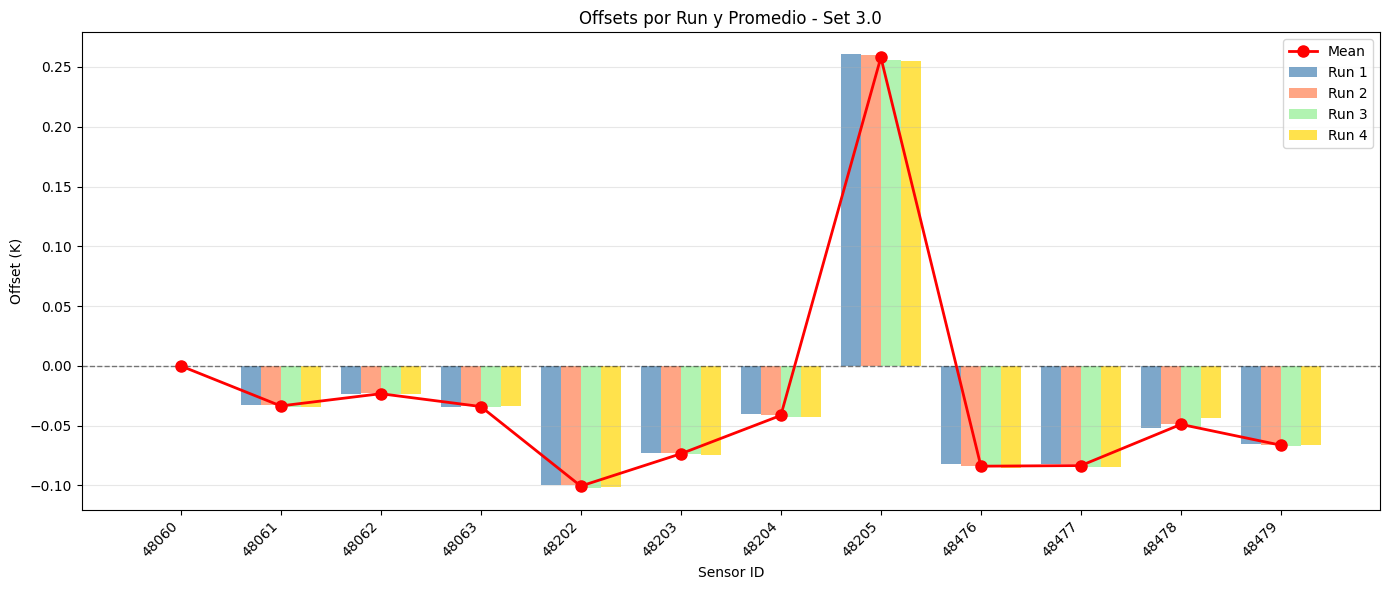

In [16]:
# Visualizar offsets de cada run + promedio
fig, ax = plt.subplots(figsize=(14, 6))

sensor_ids = df_comparison.index.values
x_pos = np.arange(len(sensor_ids))
width = 0.2

# Plot cada run
colors = ['steelblue', 'coral', 'lightgreen', 'gold']
for i, run_name in enumerate([col for col in df_comparison.columns if col.startswith('Run')]):
    offsets = df_comparison[run_name].values
    ax.bar(x_pos + i*width, offsets, width, label=run_name, alpha=0.7, color=colors[i % len(colors)])

# Plot promedio
mean_offsets = df_comparison['mean'].values
ax.plot(x_pos + 1.5*width, mean_offsets, 'ro-', linewidth=2, markersize=8, label='Mean', zorder=10)

ax.set_xlabel('Sensor ID')
ax.set_ylabel('Offset (K)')
ax.set_title(f'Offsets por Run y Promedio - Set {calib_set.set_number}')
ax.set_xticks(x_pos + 1.5*width)
ax.set_xticklabels(sensor_ids, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.legend(loc='best')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 13. Comparar múltiples CalibSets

Ver estadísticas comparativas entre diferentes sets.

In [17]:
# Crear resumen comparativo de CalibSets
summary_data = []
for set_num, calib_set in calibsets.items():
    summary_data.append({
        'Set': set_num,
        'N_Sensors': len(calib_set.sensors),
        'N_Runs': len(calib_set.runs),
        'N_Offsets': len(calib_set.mean_offsets),
        'Reference': calib_set.reference_id,
        'Mean_Offset_Abs': np.mean(np.abs(list(calib_set.mean_offsets.values()))),
        'Mean_Std': np.mean(list(calib_set.std_offsets.values())),
        'Max_Offset_Abs': np.max(np.abs(list(calib_set.mean_offsets.values()))),
        'Max_Std': np.max(list(calib_set.std_offsets.values()))
    })

df_summary = pd.DataFrame(summary_data)

print("Resumen comparativo de CalibSets:")
print("=" * 70)
display(df_summary)

print("\nEstadísticas globales:")
print(f"  Offset promedio total: {df_summary['Mean_Offset_Abs'].mean():.6f} K")
print(f"  Std promedio total: {df_summary['Mean_Std'].mean():.6f} K")

Resumen comparativo de CalibSets:


,Set,N_Sensors,N_Runs,N_Offsets,Reference,Mean_Offset_Abs,Mean_Std,Max_Offset_Abs,Max_Std
0,3.0,12,4,12,48060,0.070600,0.000158,0.257481,0.000188
1,21.0,12,4,12,49191,0.019576,0.000157,0.040564,0.000234
2,25.0,12,4,12,49250,0.018414,0.000164,0.036858,0.000208



Estadísticas globales:
  Offset promedio total: 0.036197 K
  Std promedio total: 0.000160 K


## 14. Visualizar comparación de CalibSets

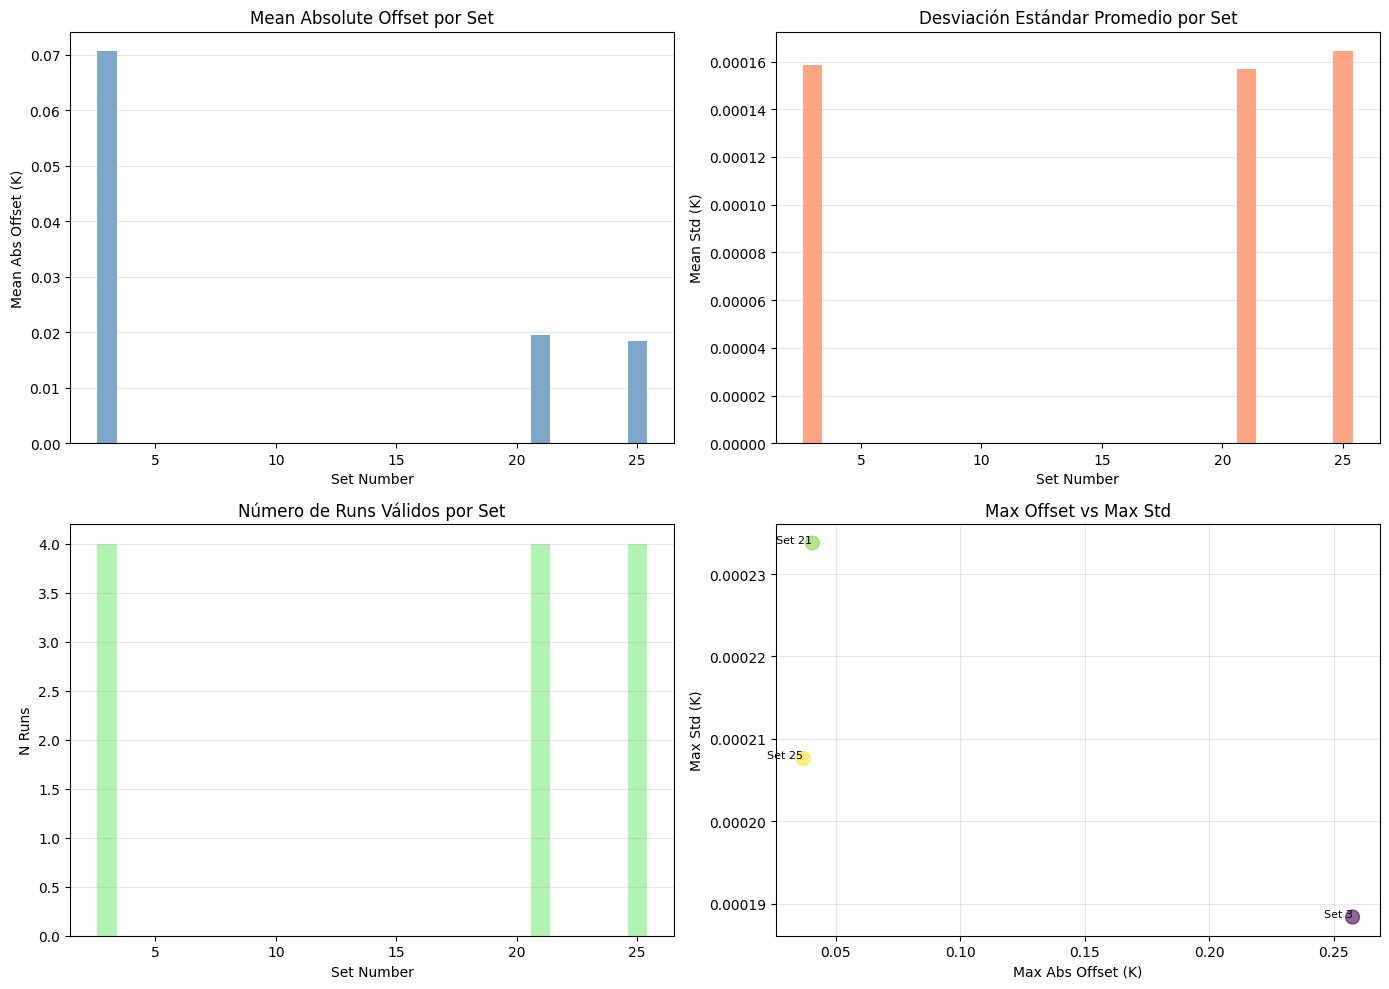

In [18]:
# Gráficos comparativos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Mean Offset por set
ax1 = axes[0, 0]
ax1.bar(df_summary['Set'], df_summary['Mean_Offset_Abs'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Set Number')
ax1.set_ylabel('Mean Abs Offset (K)')
ax1.set_title('Mean Absolute Offset por Set')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Std promedio por set
ax2 = axes[0, 1]
ax2.bar(df_summary['Set'], df_summary['Mean_Std'], color='coral', alpha=0.7)
ax2.set_xlabel('Set Number')
ax2.set_ylabel('Mean Std (K)')
ax2.set_title('Desviación Estándar Promedio por Set')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Número de runs por set
ax3 = axes[1, 0]
ax3.bar(df_summary['Set'], df_summary['N_Runs'], color='lightgreen', alpha=0.7)
ax3.set_xlabel('Set Number')
ax3.set_ylabel('N Runs')
ax3.set_title('Número de Runs Válidos por Set')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Max offset vs Max std
ax4 = axes[1, 1]
ax4.scatter(df_summary['Max_Offset_Abs'], df_summary['Max_Std'], 
            s=100, alpha=0.6, c=df_summary['Set'], cmap='viridis')
for idx, row in df_summary.iterrows():
    ax4.annotate(f"Set {int(row['Set'])}", 
                (row['Max_Offset_Abs'], row['Max_Std']),
                fontsize=8, ha='right')
ax4.set_xlabel('Max Abs Offset (K)')
ax4.set_ylabel('Max Std (K)')
ax4.set_title('Max Offset vs Max Std')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Resumen de la arquitectura

**CalibSet (~95 líneas):**
```python
class CalibSet:
    set_number: float
    sensors: set[Sensor]      # 12 instancias Sensor (del config)
    runs: list[Run]           # ~4 instancias Run válidas
    reference_id: int         # Sensor de referencia (puede cambiar si original tiene NaN)
    mean_offsets: dict[int, float]  # Media PONDERADA de offsets por sensor
    std_offsets: dict[int, float]   # Error PROPAGADO por sensor
```

**Run (~75 líneas):**
```python
class Run:
    filename: str
    offsets: dict[int, float]        # {sensor_id: offset} respecto a referencia
    offset_errors: dict[int, float]  # {sensor_id: std_error} error de cada offset
    reference_id: int
    is_valid: bool
```

**Flujo:**
1. `utils.create_calibration_set()` crea CalibSet vacío
2. Crea 12 instancias Sensor del config → `calibset.sensors`
3. Procesa runs válidos → `calibset.runs`
   - Cada run calcula `offset = mean(T_sensor - T_ref)` en ventana 20-40 min
   - Cada run calcula `offset_error = std(T_sensor - T_ref)` en la misma ventana
4. Calcula mean_offsets y std_offsets con `utils.calculate_set_statistics()`
   - **Media ponderada**: μ = Σ(w_i * x_i) / Σ(w_i), donde w_i = 1/σ_i²
   - **Error propagado**: σ = 1/√(Σ(w_i))

**Manejo de sensores omitidos:**
- Si CalibSet tiene 12 sensores pero solo 10 offsets → 2 sensores omitidos en todos los runs
- Razón: >40 NaN, canal defectuoso, etc. (NO por estar en config.discarded)
- La razón está en `run.omitted_sensors` de cada run
- CalibSet NO sabe por qué, solo tiene los offsets calculables

**Sensores descartados (config.discarded):**
- **Run SÍ calcula offsets para sensores descartados** (si tienen datos válidos)
- Run NO conoce la lista de descartados del config
- **Tree** será quien excluya sensores descartados en la propagación final
- Esto permite auditar offsets de sensores descartados antes de excluirlos

**Búsqueda automática de referencia:**
- Si referencia original tiene >40 NaN → busca automáticamente otra referencia válida
- Intenta con cualquiera de los 12 sensores del set
- Solo falla si TODOS tienen >40 NaN (caso extremo)
- `run.reference_id` indica la referencia realmente usada (puede diferir de la original)

**Estadísticas con pocos runs:**
- Con 1 run: std=0 (sin variabilidad)
- Con 2+ runs: std calculado con ddof=1
- CalibSet procesa todos los runs disponibles, aunque sean pocos
- Canales defectuosos se detectan automáticamente en cada run

**Exportación CSV (clase CalibSet):**
```python
# CalibSet individual (media ponderada)
utils.export_calibset_to_csv(calibset)

# Múltiples CalibSets
utils.export_multiple_calibsets_to_csv(calibsets)

# Leer CSV
df = pd.read_csv('calibset_3.csv')
# Columnas: set_number, sensor_id, mean_offset, std_offset, n_runs, reference_id
```

**Para offsets individuales de cada run, usar exportación de Run:**
```python
# Ver notebook RUN.ipynb sección 11d para exportar runs individuales
utils.export_multiple_runs_to_csv(calibset.runs, set_number=3)
```

**Integración:**
- CalibSet contiene objetos Sensor (composición)
- CalibSet contiene objetos Run (composición)
- Tree usará Dict[float, CalibSet] para calcular constantes finales

**Siguiente paso:** Tree class - manejo de parent_sets, rounds, raised, propagación de offsets